In [35]:
import requests
import pandas as pd

from rdkit import Chem
from rdkit.Chem import AllChem, Mol, MACCSkeys

from rdkit.Chem import PandasTools

GROUPED = {
    "motif_active_binding_1um": [
        "c1ccccc1CCNC",  # 1
        "c1ccccc1CN2CCCCC2",  # 2
        "c1ccccc1C(F)(F)F",  # na   # 3
    ],
    "motif_active_binding_10um": [
        "CCOc1ccccc1",  # 4
        "c1ccccc1CNCC",  # 5
    ],
    "motif_active_functional_1um": [
        "c1ccccc1Cc1ccccc1",  # 6
        "NCCc1ccccc1",  # 7
    ],
    "motif_active_functional_10um": [
        "CCc1ccccc1",  # 8
        "Oc1ccccc1",  # 9
        "NCCc1ccccc1",  # 7
    ],
    "motif_inactive_binding_1um": [
        "n1ccccc1",  # 10
        "COc1ccccc1",  # 11
        "n1ccccc1C",  # 10
        "NCCc1ccccc1",  # na #12
        "c1ccccc1C(F)(F)F",  # na # 3
    ],
    "motif_inactive_binding_10um": [
        "n1ccccc1",  # 13
        "n1ccccc1C",  # 14
        "c1cc(C)ccc1C",  # 15
        "NCCc1ccccc1",  # na #12
        "CCNCc1ccccc1",  # 16
    ],
    "motif_inactive_functional_1um": [
        "Oc1ccccc1",  # 17
        "CCc1ccccc1",  # 18
    ],
    "motif_inactive_functional_10um": [
        "Cc1ccccc1",  # 19
        "CCc1ccccc1",
    ],
}

CACTUS = "https://cactus.nci.nih.gov/chemical/structure/{0}/{1}"

In [2]:
def smiles_to_iupac(smiles):
    rep = "iupac_name"
    url = CACTUS.format(smiles, rep)
    response = requests.get(url)
    response.raise_for_status()
    return response.text

In [29]:
#df = pd.DataFrame(columns=["smile", "iupac_name", "drawing", "active_binding_1μM", "active_binding_10um", "active_functional_1um"])

motifs = []
for k, v in GROUPED.items():
    for s in v:
        motifs.append(s)

motifs = list(set(motifs))
motifs.sort()

In [36]:
actives = []
inactives = []

for m in motifs:
    active = " "
    inactive = " "

    for k, v in GROUPED.items():
        if m in v and "motif_active" in k:
            active = "1"

        if m in v and "motif_inactive" in k:
            inactive = "1"

    actives.append(active)
    inactives.append(inactive)




In [38]:
iupac_names = []

for m in motifs:
    iupac_names.append(smiles_to_iupac(m))

,,smiles,iupac names,molecule,hERG active,hERG inactive
0,1,CCNCc1ccccc1,N-(phenylmethyl)ethanamine,,,1
1,2,CCOc1ccccc1,Ethoxybenzene,,1,
2,3,CCc1ccccc1,Ethylbenzene,,1,1
3,4,COc1ccccc1,Methoxybenzene,,,1
4,5,Cc1ccccc1,methylbenzene,,,1
5,6,NCCc1ccccc1,2-phenylethanamine,,1,1
6,7,Oc1ccccc1,PHENOL,,1,1
7,8,c1cc(C)ccc1C,"1,4-Dimethylbenzene",,,1
8,9,c1ccccc1C(F)(F)F,Trifluoromethylbenzene,,1,1
9,10,c1ccccc1CCNC,N-methyl-2-phenylethanamine,,1,

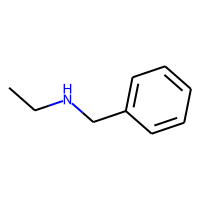
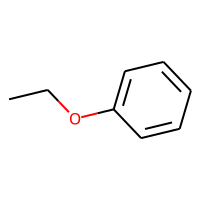
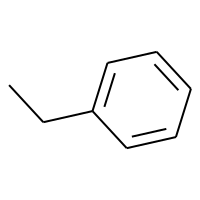
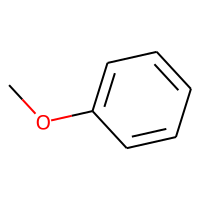
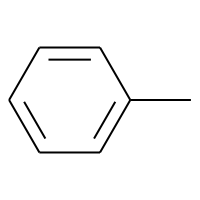
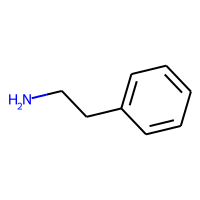
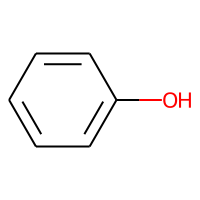
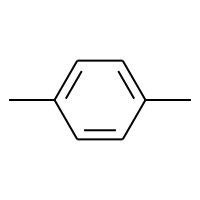
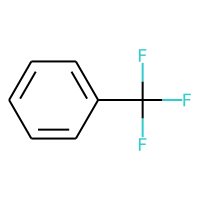
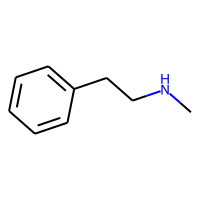
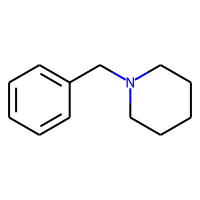
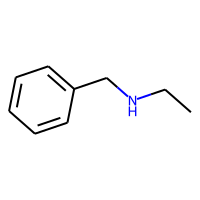
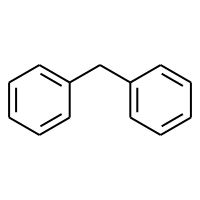
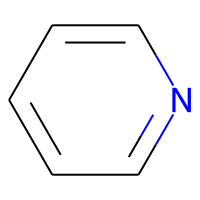
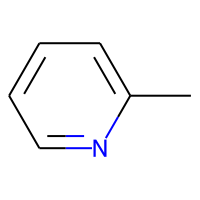

In [61]:
from rdkit.Chem.Draw.MolDrawing import MolDrawing, DrawingOptions #Only needed if m

DrawingOptions.bondLineWidth=1.8

df = pd.DataFrame()
df[" "] = list(range(1, len(motifs) + 1))
df["smiles"] = motifs
df["iupac names"] = iupac_names
PandasTools.AddMoleculeColumnToFrame(df, smilesCol="smiles", molCol="molecule")
df["hERG active"] = actives
df["hERG inactive"] = inactives

df.head(n=15)

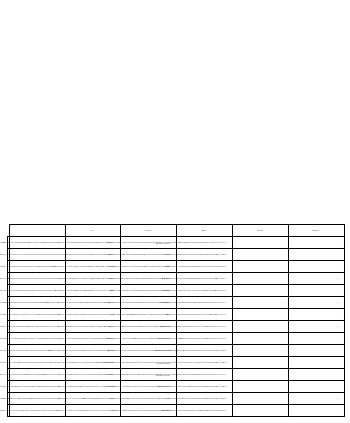

In [62]:
import matplotlib.pyplot as plt
import pandas as pd
from pandas.plotting import table

ax = plt.subplot(111, frame_on=False) # no visible frame
ax.xaxis.set_visible(False)  # hide the x axis
ax.yaxis.set_visible(False)  # hide the y axis

table(ax, df)  # where df is your data frame

plt.savefig('hergophores.png')
